# In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow.

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensor
* Tensors & Numpy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow (or TPUs)
* Exercises to try for yourself!

## Introduction to Tensor

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.17.0


In [2]:
# Create tensors with tf.constant() (this is the function to create tensors-like objects)
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [4]:
# Create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [5]:
# Check the dimensions of our vector
vector.ndim

1

In [6]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10,7],
                     [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [7]:
matrix.ndim

2

By default, TensorFlow creates tensors with either an `int32` or `float32` datatype.
This is know as 32-bit precision (the higher the number, the more precise the number, the more space it takes up on your computer)

In [8]:
# Create another matrix
another_matrix = tf.constant([[10.,7.],
                              [3.,2.],
                              [8.,9.]], dtype=tf.float16) #specify the data type with dtype parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [9]:
another_matrix.ndim

2

In [10]:
# Let's create a tensor
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [11]:
tensor.ndim

3

What we've created so far:
* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers (where n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector, a 2-dimensional tensor is a matrix)

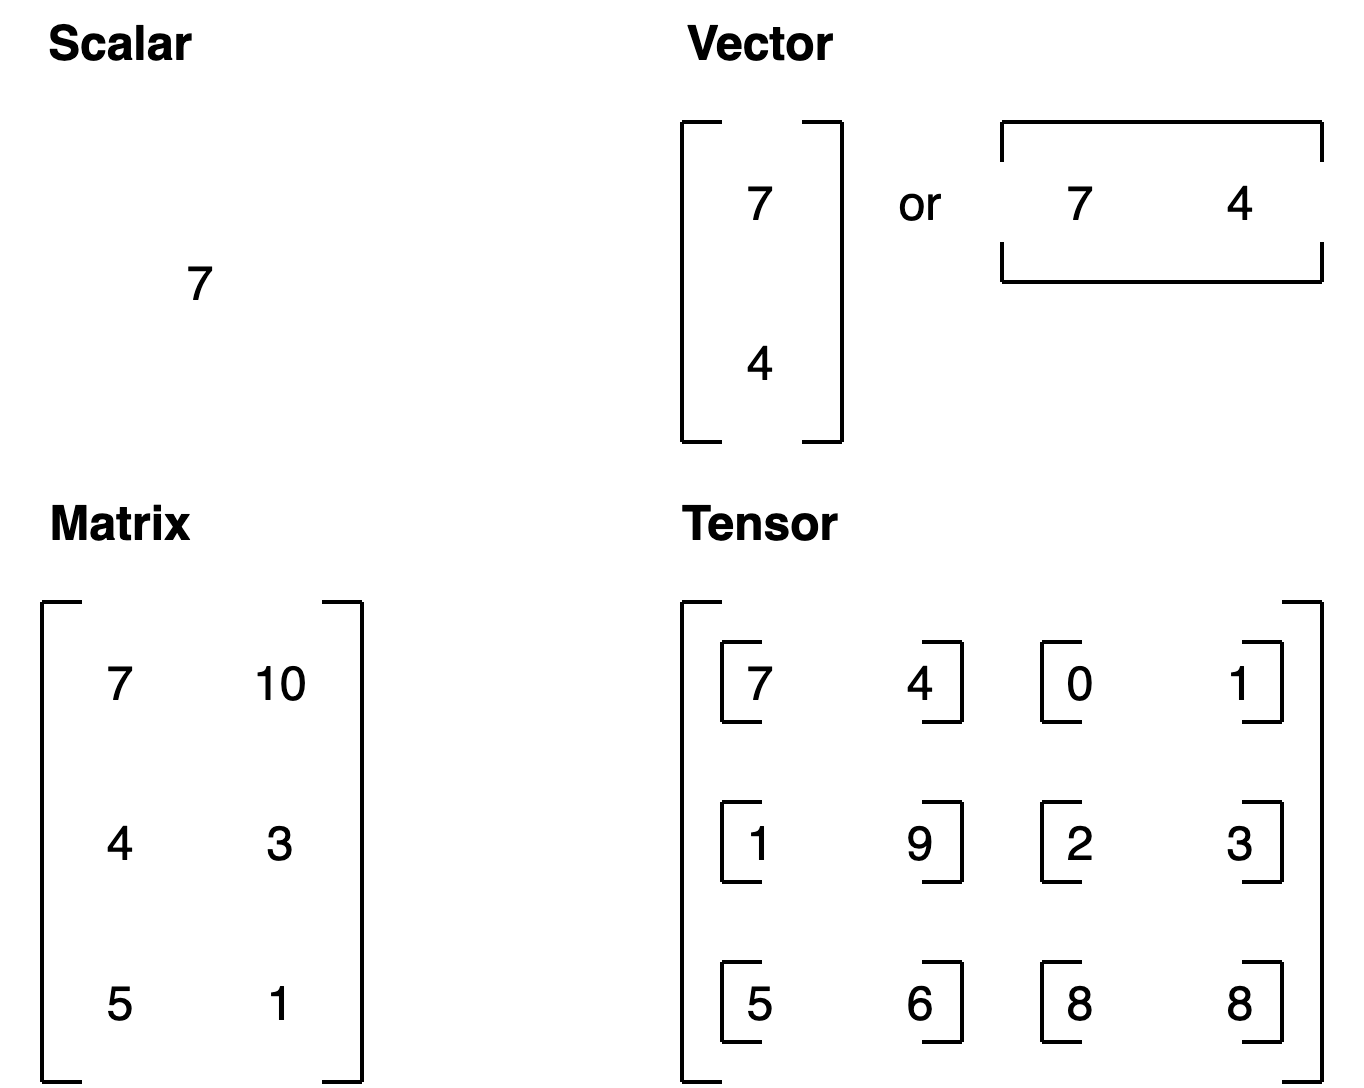

### Creating tensors with `tf.Variable`

The difference between `tf.Variable()` and `tf.constant()` is tensors created with `tf.constant()` are inmutable (can't be changed, can only be used to create a new tensor), where as, tensors created with `tf.Variable()`are mutable (can be changed).

In [12]:
# Create the same tensor with tf.Variable() as above
changeable_tensor = tf.Variable([10,7])
unchangeable_tensor = tf.constant([10,7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In [13]:
# Let's try to change one of the elements in our changeable tensor
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

To change an element of a `tf.Variable()` tensor requires the `assing()` method.

In [14]:
# How about we try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

In [15]:
# Let's try to change our unchangable tensor
unchangeable_tensor[0].assign(7)
unchangeable_tensor

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

### Shuffle the order of elements in a tensor

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning )
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled)

In [16]:
# Shuffle our non-shuffled tensor
tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

NameError: name 'not_shuffled' is not defined

: ⚒ **Exercise:**Read through TensorFlow documentation on random seed generation: https://www.tensorflow.org/api_docs/python/tf/random/set_seed
 and practice writing 5 random tensors and shuffle them.

 Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed.

 Its interactions with operation-level seeds is as follows:
  1. If neither the global seed nor the operation seed is set: A randomly picked seed is used for this op. We get different results for every call to the random op and every re-run of the program:
  2. If the global seed is set, but the operation seed is not: The system deterministically picks an operation seed in conjunction with the global seed so that it gets a unique random sequence.
  We get different results for every call to the random op, but the same sequence for every re-run of the program.
  3. If the operation seed is set, but the global seed is not set: A default global seed and the specified operation seed are used to determine the random sequence.
  We get different results for every call to the random op, but the same sequence for every re-run of the program:
  4. If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence.

  It looks like if we want our shuffle tensors to be in the same order, we've got to use the global level random seed as well as the operation level random seed:
  > Rule 4: "If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

In [ ]:
tf.random.set_seed(42) #global leven random seed
tf.random.shuffle(not_shuffled, seed=42) #operation level random seed

### Other ways to make tensors

You can use `tf.ones()` to create a tensor of all ones and `tf.zeros()` to create a tensor of all zeros.

In [17]:
# Create a tensor of all ones
tf.ones([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [18]:
# Create a tensor of all zeroes
tf.zeros([10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

### Turn Numpy arrays into tensors

The main difference between Numpy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numerical computing).

> 🔑 Note: A matrix or tensor is typically represented by a capital letter (e.g. X or A) where as a vector is typically represented by a lowercase letter (e.g. y or b).

X = tf.constant(some_matrix)

y = tf.constant(vector)

In [19]:
# You can also turn Numpy arrays into tensors
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) #create a Numpy array between 1 and 25
numpy_A


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int32)

In [20]:
A = tf.constant(numpy_A, shape=(2, 3,4))
B = tf.constant(numpy_A)
A, B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]], dtype=int32)>,
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32)>)

### Getting information from tensors

When dealing with tensors you probably want to be aware of the following attributes:

* **Shape:** is the length (number of elements) of each of the dimensions of a tensor. `tensor.shape`
* **Rank:** is the number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2, a tensor has rank n. `tensor.ndim`
* **Axis or dimension:** is a particular dimension of a tensor. `tensor[0]`, `tensor[:,1]`...
* **Size:** is the total of items in the tensor. `tf.size(tensor)`

In [21]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=[2,3,4,5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [22]:
rank_4_tensor[0]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [23]:
rank_4_tensor[0,0,0:]

<tf.Tensor: shape=(4, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [24]:
rank_4_tensor[0,0,0,0:]

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([0., 0., 0., 0., 0.], dtype=float32)>

In [25]:
rank_4_tensor[1]

<tf.Tensor: shape=(3, 4, 5), dtype=float32, numpy=
array([[[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]], dtype=float32)>

In [26]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [27]:
# Get various attributes of our tensor
print("Datatype of every element: ", rank_4_tensor.dtype)
print("Number of dimensions (rank): ", rank_4_tensor.ndim)
print("Shape of our tensor: ", rank_4_tensor.shape)
print("Elements along the 0 axis: ", rank_4_tensor.shape[0])
print("Elements along the last axis: ", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor: ", tf.size(rank_4_tensor))
print("Total number of elements in our tensor: ", tf.size(rank_4_tensor).numpy())

Datatype of every element:  <dtype: 'float32'>
Number of dimensions (rank):  4
Shape of our tensor:  (2, 3, 4, 5)
Elements along the 0 axis:  2
Elements along the last axis:  5
Total number of elements in our tensor:  tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor:  120


### Indexing tensors

Tensors can be indexed just like Python list.

In [28]:
some_list = [1, 2, 3, 4]
some_list[:2]

[1, 2]

In [29]:
# Get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [30]:
some_list[:1]

[1]

In [31]:
rank_4_tensor.shape

TensorShape([2, 3, 4, 5])

In [32]:
# Get the first element form each dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [33]:
rank_4_tensor[:1, :1, :, :1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

In [34]:
rank_4_tensor[:1, :, :1, :1]

<tf.Tensor: shape=(1, 3, 1, 1), dtype=float32, numpy=
array([[[[0.]],

        [[0.]],

        [[0.]]]], dtype=float32)>

In [35]:
rank_4_tensor[:, :1, :1, :1]

<tf.Tensor: shape=(2, 1, 1, 1), dtype=float32, numpy=
array([[[[0.]]],


       [[[0.]]]], dtype=float32)>

In [36]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10,7],
                             [8,5]])
rank_2_tensor.shape, rank_2_tensor.ndim

(TensorShape([2, 2]), 2)

In [37]:
some_list[-1]

4

In [38]:
# Get the last item of each  of our row rank 2 tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 5], dtype=int32)>

In [39]:
# Add in an extra dimension to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 8],
        [ 5]]], dtype=int32)>

In [40]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis = -1) # -1 means expand the final axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 8],
        [ 5]]], dtype=int32)>

In [41]:
tf.expand_dims(rank_2_tensor,axis =0) #expand the 0 axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 8,  5]]], dtype=int32)>

### Manipulating tensors (tensor operations)

**Basic operations**
`+`, `-`, `*`, `/`

In [42]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10,7],[3,4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

In [43]:
# Original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [44]:
# Multiplication also works
tensor *10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [45]:
# susbtraction
tensor -10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

You can also use the equivalent TensorFlow function. Using the TensorFlow function (where possible) has the advantage of being sped up later down the line when running as part of a TensorFlow graph.

In [46]:
# We can use the tensorflow built-in function too
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

**Matrix multiplication**

In machine learning, matrix multiplication is one of the most common tensor operations.

There are two rules our tensors (or matrices) need to fullfill if we're going to matrix multiply them:

1. The inner dimensions must match
 * `(3,5) @ (3,5)` won't work
 * `(5,3) @ (3,5)` will work
 * `(3,5) @ (5,3)` will work

2. The resulting matrix has the shape of the outer dimensions
 * `(5,3) @ (3,5)` -> `(5,5)`
 * `(3,5) @ (5,3)` -> `(3,3)`

 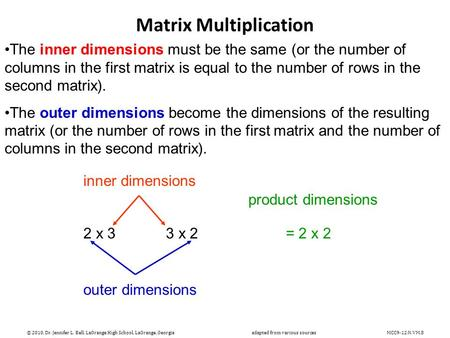

In [47]:
# Matrix multiplication in tensorflow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [48]:
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

In [49]:
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]], dtype=int32)>

🔑 Note: `@` in Python is the symbol for matrix multiplication.

In [50]:
# MAtrix multiplication with Python operator "@"
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [51]:
# Create a tensor (3,2) tensor
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])

# Create another (3,2) tensor
Y = tf.constant([[7,8],
                 [9,10],
                  [11,12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [52]:
# Try yo matrix multiply tensors of same shape
tf.matmul(X,Y)

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul] name: 

📖 **Resource:** Info and example of matrix multiplication:
https://www.mathsisfun.com/algebra/matrix-multiplying.html


Trying to matrix multiply two tensor with shape `(3,2)` errors because the inner dimensions don't match.

We need to either:

* Reshape X to `(2, 3)` so it's `(2, 3) @ (3, 2)`.
* Reshape Y to `(3, 2)` so it's `(3, 2) @ (2, 3)`.

We can do this with either:
* `tf.reshape()` - allows us to reshape a tensor into a defined shape. Just shuffles the tensor around into the shape that you want.
* `tf.transpose()` - switches the dimensions of a given tensor. It flips the axes.

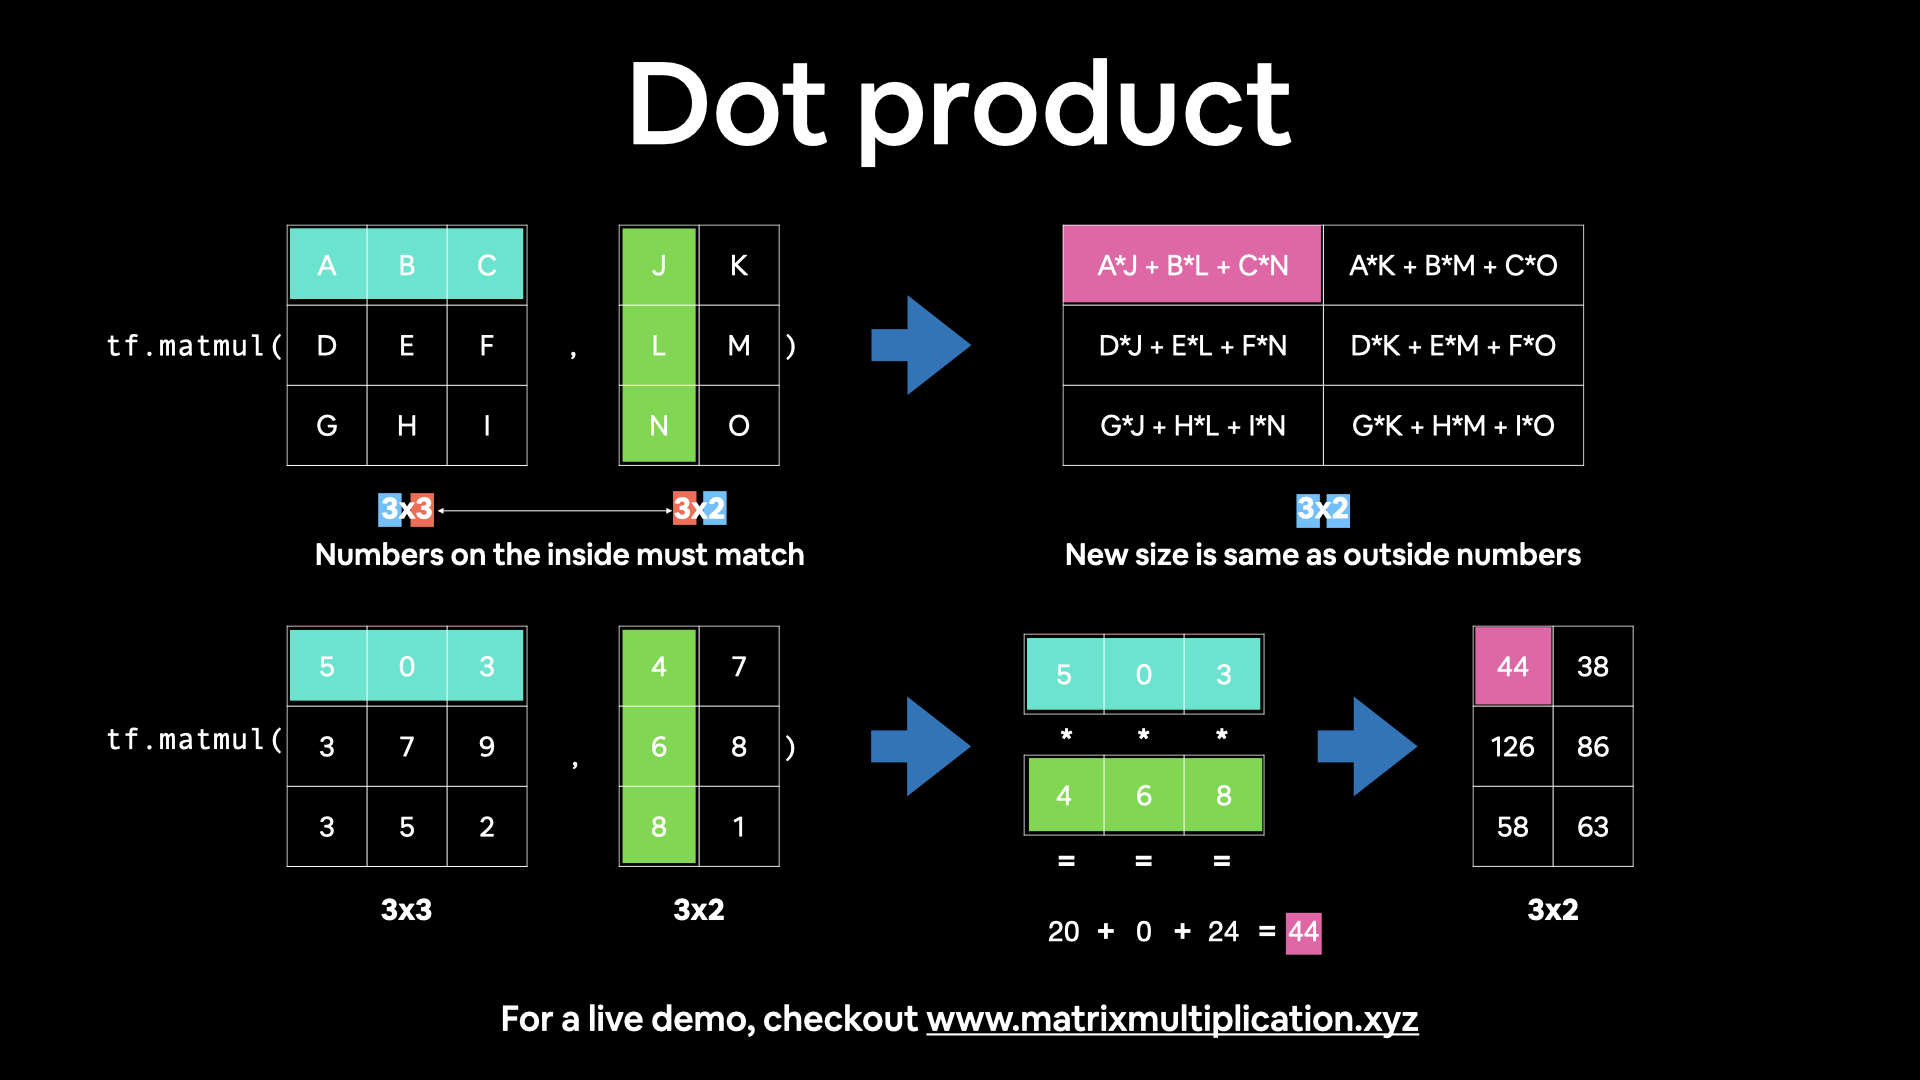

In [53]:
Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]], dtype=int32)>

In [54]:
# Let's change the shape of Y
tf.reshape(Y, shape=(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [55]:
X.shape, tf.reshape(Y, shape=(2,3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [56]:
# try to multiply X by reshaped Y
X @ tf.reshape(Y, shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [57]:
tf.matmul(X, tf.reshape(Y, shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [58]:
tf.reshape(X, shape=(2,3)).shape, Y.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [59]:
# Try change the shape of X instead of Y
tf.matmul(tf.reshape(X, shape=(2,3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]], dtype=int32)>

In [60]:
# Can do the same with transpose
X, tf.transpose(X), tf.reshape(X, shape=(2,3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]], dtype=int32)>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]], dtype=int32)>)

In [61]:
# Try matrix multiplication with transpose rathern than reshape
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

**The dot product**

Matrix multiplication is also referred to as the dot product.

You can perform matrix multiplication by using:
* `tf.matmul()`
* `tf.tensordot()`
* `@`

In [62]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [63]:
# Perform the dot product on X and Y (requieres X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y,axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [64]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [65]:
# Perform matrix multiplication between X and Y(reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2,3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

In [66]:
# Check the values of Y, reshape Y and transposed Y
print("Normal Y:" )
print(Y, "\n") # "\n" is for newline

print("Y reshaped to (2,3): ")
print(tf.reshape(Y,shape= (2,3)), "\n")

print("Y transposed: ")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2,3): 
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed: 
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [67]:
tf.matmul(X,tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

Generally, when performing matrix multiplication on two tensors and one of the axes doesn't line up, you will transpose (rather than reshape) one of the tensors to get satisfy the matrix multiplication rules.

### Changing the datatype of a tensor

In [68]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [69]:
C = tf.constant([7,10])
C.dtype

tf.int32

In [70]:
# Change from float32 to float16 (reduced precision)
D = tf.cast(B, dtype=tf.float16)
D, D.dtype

(<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>,
 tf.float16)

In [71]:
# Change from int32 to float 32
E = tf.cast(C, dtype=tf.float32)
E


<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

In [72]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

### Aggregating tensors

Aggregation tensors = condensing them from multiple values down to a smaller amount of values.

In [73]:
# Get the absolute values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [74]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

Let's go through the following forms of aggregation:
* Get the minimum
* Get the maximun
* Get the mean of a tensor
* Get the sum of a tensor

In [75]:
# Create a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(0,100, size=50))
E

# Convert to float32
E_float = tf.cast(E, dtype=tf.float32)
E_float

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([28., 54., 40., 13., 94., 42., 65., 74., 53., 34., 22., 31., 16.,
       31., 19., 25., 29., 56., 69.,  2., 53.,  6., 20., 11., 21., 40.,
       77., 35., 92., 72., 77.,  4., 69., 78., 86., 40., 29., 41., 87.,
       69., 92., 14., 48., 74., 34., 32., 64., 45., 31., 33.],
      dtype=float32)>

In [76]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [77]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [78]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=94>

In [79]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=45>

In [80]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2271>

⚒ **Exercise:** With what we've just learned, find the variance and standard deviation of our `E` tensor using TensorFlow methods.

In [81]:
# Find the standar deviation
tf.math.reduce_std(E_float)

<tf.Tensor: shape=(), dtype=float32, numpy=25.539845>

In [82]:
# Find the variance
tf.math.reduce_variance(E_float)

<tf.Tensor: shape=(), dtype=float32, numpy=652.2836>

### Find the positional maximum and minimum

How about finding the position a tensor where the maximum value occurs?

This is helpful when you want to line up your labels (say `['Green', 'Blue', 'Red']`) with your prediction probabilities tensor (e.g. `[0.98, 0.01, 0.01]`).

In this case, the predicted label (the one with the highest prediction probability) would be 'Green'.

You can do the same for the minimum (if required) with the following:

* `tf.argmax()` - find the position of the maximum element in a given tensor. Returns the index with the largest value across axes of a tensor.
* `tf.argmin()` - find the position of the minimum element in a given tensor. Returns the index with the smallest value across axes of a tensor.

In [83]:
# Create a new tensor for finding positional minimun and maximun
tf.random.set_seed(42)
F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [84]:
# Positional maximum
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [85]:
# Positional minimun
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

### Squeezing a tensor (removing all single dimensions)

If you need to remove single-dimensions from a tensor (dimensions with size 1):

* `tf.squeeze()` - remove all dimensions of 1 from a tensor.

In [86]:
# Create a tensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape=(1,1,1,1,50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [87]:
tf.squeeze(G)

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

### One-hot enconding tensors

In [88]:
# Create a list of indices
some_list = [0, 1, 2, 3] #could be red, gree, blue, purple

# One hot enconde our list
tf.one_hot(some_list, depth= 4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [89]:
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="Yo I love deep learning", off_value="I also like to dance")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Yo I love deep learning', b'I also like to dance',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'Yo I love deep learning',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'Yo I love deep learning', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'I also like to dance', b'Yo I love deep learning']],
      dtype=object)>

### Squaring, log, square root


In [90]:
# Create a new tensor
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)>

In [91]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81], dtype=int32)>

In [92]:
# Find the squareroot (will error, method requieres no-int type)
#tf.sqrt(H)

In [93]:
# Find square root
tf.sqrt(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [94]:
# Find the log
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and Numpy

TensorFlow interact beautifully with Numpy arrays.

🔑 **Note:** One of the main differences between a TensorFlow tensor and a Numpy array is that a TensorFlow tensor van be run on a GPU or TPU (for faster numerical processing)

In [95]:
# Create a tensor directly from a Numpy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [96]:
# Convert our tensor back to a Numpy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [97]:
# Convert tensor J to a Numpy array
J.numpy(), type(J.numpy)

(array([ 3.,  7., 10.]), method)

In [98]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])

# Check the datatypes of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

### Finding access to GPUs

In [99]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

## ⚒ Exercises

1. Create a vector, scalar, matrix and tensor with values of your choosing using `tf.constant()`.

In [100]:
# Scalar
scalar = tf.constant(8)

# Vector
vector = tf.constant([5,90])

# Matrix
matrix = tf.constant([[6,5],[1,4]])

# Tensor
tensor = tf.constant([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

scalar, vector, matrix, tensor

(<tf.Tensor: shape=(), dtype=int32, numpy=8>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 5, 90], dtype=int32)>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[6, 5],
        [1, 4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6]],
 
        [[ 7,  8,  9],
         [10, 11, 12]]], dtype=int32)>)

2. Find the shape, rank and size of the tensors you created in 1.

In [101]:
scalar.shape, scalar.ndim, tf.size(scalar)

(TensorShape([]), 0, <tf.Tensor: shape=(), dtype=int32, numpy=1>)

In [102]:
vector.shape, vector.ndim, tf.size(vector)

(TensorShape([2]), 1, <tf.Tensor: shape=(), dtype=int32, numpy=2>)

In [103]:
matrix.shape, matrix.ndim, tf.size(matrix)

(TensorShape([2, 2]), 2, <tf.Tensor: shape=(), dtype=int32, numpy=4>)

In [104]:
tensor.shape, tensor.ndim, tf.size(tensor)

(TensorShape([2, 2, 3]), 3, <tf.Tensor: shape=(), dtype=int32, numpy=12>)

3. Create two tensors containing random values between 0 and 1 with shape `[5, 300]`

In [121]:
random_tensor = tf.random.uniform(shape=[5, 300], minval=0, maxval=1)
random_tensor

<tf.Tensor: shape=(5, 300), dtype=float32, numpy=
array([[0.803156  , 0.49777734, 0.37054038, ..., 0.42893624, 0.49179256,
        0.39297235],
       [0.14517438, 0.72666824, 0.80103934, ..., 0.832801  , 0.649397  ,
        0.29312778],
       [0.4216962 , 0.6768439 , 0.5627917 , ..., 0.56929183, 0.90308595,
        0.31530714],
       [0.6198498 , 0.70206463, 0.994668  , ..., 0.03745186, 0.23192072,
        0.23984468],
       [0.01790595, 0.40531397, 0.5369972 , ..., 0.62693167, 0.47887897,
        0.25383985]], dtype=float32)>

In [122]:
random_tensor_2 = tf.random.uniform(shape=[5,300], minval=0, maxval=1)
random_tensor_2

<tf.Tensor: shape=(5, 300), dtype=float32, numpy=
array([[0.95831835, 0.01680839, 0.3156035 , ..., 0.67105925, 0.76730955,
        0.20125735],
       [0.09921694, 0.02475083, 0.47242153, ..., 0.9631474 , 0.34333456,
        0.8129494 ],
       [0.08817983, 0.9311962 , 0.2293179 , ..., 0.41450226, 0.008304  ,
        0.02438807],
       [0.54814565, 0.37019622, 0.5272658 , ..., 0.8656951 , 0.19644582,
        0.5959221 ],
       [0.8964087 , 0.15288067, 0.3360591 , ..., 0.5725572 , 0.4094149 ,
        0.40059018]], dtype=float32)>

4. Multiply the two tensors you created in 3 using multipliaction.


In [123]:
tf.matmul(tf.transpose(random_tensor), random_tensor_2)


<tf.Tensor: shape=(300, 300), dtype=float32, numpy=
array([[1.177087  , 0.6419784 , 0.7516079 , ..., 1.4004368 , 0.7987123 ,
        0.6665    ],
       [1.3569716 , 0.97849333, 1.1619905 , ..., 2.1543193 , 0.9409194 ,
        1.2881734 ],
       [1.5107911 , 1.0004429 , 1.3293475 , ..., 2.4219928 , 0.9792701 ,
        1.5473644 ],
       ...,
       [1.1264015 , 0.66765493, 0.88978887, ..., 1.7173007 , 0.88381606,
        1.0506966 ],
       [1.1717565 , 1.0243571 , 0.9523099 , ..., 1.8047764 , 0.8494368 ,
        0.97896916],
       [0.79249364, 0.43507   , 0.54657596, ..., 1.0296987 , 0.5558329 ,
        0.5696909 ]], dtype=float32)>

5. Multiply the two tensors you created in 3 using dot product.

In [124]:
tf.tensordot(tf.transpose(random_tensor), random_tensor_2, axes=1)

<tf.Tensor: shape=(300, 300), dtype=float32, numpy=
array([[1.177087  , 0.6419784 , 0.7516079 , ..., 1.4004368 , 0.7987123 ,
        0.6665    ],
       [1.3569716 , 0.97849333, 1.1619905 , ..., 2.1543193 , 0.9409194 ,
        1.2881734 ],
       [1.5107911 , 1.0004429 , 1.3293475 , ..., 2.4219928 , 0.9792701 ,
        1.5473644 ],
       ...,
       [1.1264015 , 0.66765493, 0.88978887, ..., 1.7173007 , 0.88381606,
        1.0506966 ],
       [1.1717565 , 1.0243571 , 0.9523099 , ..., 1.8047764 , 0.8494368 ,
        0.97896916],
       [0.79249364, 0.43507   , 0.54657596, ..., 1.0296987 , 0.5558329 ,
        0.5696909 ]], dtype=float32)>

6. Create a tensor with random values between 0 and 1 with shape `[224, 224,3]`

In [125]:
random_tensor_3 = tf.random.uniform(shape=[224,224,3], minval=0, maxval=1)
random_tensor_3

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.43555546, 0.52486527, 0.49674678],
        [0.06710219, 0.35815144, 0.5931845 ],
        [0.8396933 , 0.32720697, 0.08762932],
        ...,
        [0.24612641, 0.9342215 , 0.05903411],
        [0.93307066, 0.512503  , 0.48924422],
        [0.97681785, 0.9894414 , 0.81736803]],

       [[0.9728149 , 0.7123945 , 0.24925625],
        [0.27054942, 0.65331674, 0.25431752],
        [0.29969907, 0.6473402 , 0.61158216],
        ...,
        [0.41850114, 0.9183353 , 0.08774114],
        [0.60710025, 0.92464304, 0.29132044],
        [0.14755595, 0.03294516, 0.8127129 ]],

       [[0.90104914, 0.00804007, 0.2443372 ],
        [0.71701133, 0.90716815, 0.21456563],
        [0.7990829 , 0.9918189 , 0.51183915],
        ...,
        [0.8509488 , 0.8159404 , 0.47705805],
        [0.07570207, 0.73422337, 0.3427385 ],
        [0.26765156, 0.38085854, 0.45572805]],

       ...,

       [[0.18761933, 0.00920856, 0.70124197],
        [0.08

7. Find the min and max values of the tensor you created in 6 along the first axis.

In [128]:
tf.reduce_max(random_tensor_3, axis = 0)


<tf.Tensor: shape=(224, 3), dtype=float32, numpy=
array([[0.98607254, 0.9961443 , 0.99868274],
       [0.99964154, 0.9988501 , 0.9914309 ],
       [0.992715  , 0.99950886, 0.9997566 ],
       [0.9979192 , 0.9978243 , 0.99705446],
       [0.9996182 , 0.99668956, 0.9992132 ],
       [0.9957093 , 0.9942653 , 0.9985763 ],
       [0.99387467, 0.99472237, 0.99886274],
       [0.99906206, 0.9935734 , 0.9970306 ],
       [0.99505377, 0.9989778 , 0.99490035],
       [0.99910164, 0.99492097, 0.99387   ],
       [0.9980935 , 0.99794614, 0.99433196],
       [0.9880122 , 0.9915434 , 0.9965339 ],
       [0.9932171 , 0.9969417 , 0.9927527 ],
       [0.99957395, 0.9994823 , 0.99919784],
       [0.99877846, 0.9997083 , 0.9985887 ],
       [0.99821043, 0.9986056 , 0.97759163],
       [0.99996245, 0.99556327, 0.9982575 ],
       [0.9964516 , 0.9968709 , 0.99996066],
       [0.991405  , 0.99748945, 0.9982796 ],
       [0.9980217 , 0.99476707, 0.99240375],
       [0.9930619 , 0.9968635 , 0.9994798 ],
     

In [129]:
tf.reduce_min(random_tensor_3, axis=0)

<tf.Tensor: shape=(224, 3), dtype=float32, numpy=
array([[8.49997997e-03, 5.60736656e-03, 9.98818874e-03],
       [1.88570023e-02, 1.02828741e-02, 1.28519535e-02],
       [4.29856777e-03, 6.42573833e-03, 6.83450699e-03],
       [2.79080868e-03, 6.89864159e-04, 4.62758541e-03],
       [2.37572193e-03, 1.99508667e-03, 3.40640545e-03],
       [9.19580460e-04, 7.37047195e-03, 8.53466988e-03],
       [1.51669979e-03, 4.44531441e-04, 5.17797470e-03],
       [1.69396400e-02, 2.28357315e-03, 7.54106045e-03],
       [6.81519508e-04, 1.10113621e-03, 3.29613686e-03],
       [2.46565342e-02, 1.72865391e-03, 5.30302525e-03],
       [8.64434242e-03, 3.90803814e-03, 1.63829327e-03],
       [5.48040867e-03, 7.15255737e-06, 1.57380104e-03],
       [1.38278008e-02, 1.59609318e-03, 8.50152969e-03],
       [8.81075859e-04, 8.09907913e-04, 3.33189964e-04],
       [8.11636448e-03, 7.76994228e-03, 2.43318081e-03],
       [4.32610512e-04, 8.28981400e-04, 1.42681599e-02],
       [1.70063972e-03, 2.19082832e-03

8. Create a tensor with random values of shape `[1, 224, 224, 3]` then squeeze it to change the shape to `[224, 224, 3]`

In [131]:
random_tensor_4 = tf.random.uniform(shape=[1,224,224,3])
random_tensor_4


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.2046014 , 0.82478166, 0.81674874],
         [0.57813525, 0.72301936, 0.9893687 ],
         [0.33879173, 0.4470011 , 0.24898088],
         ...,
         [0.574314  , 0.6185826 , 0.4371407 ],
         [0.45086288, 0.673488  , 0.19694173],
         [0.7261505 , 0.4120711 , 0.11013401]],

        [[0.6134424 , 0.91840196, 0.6838045 ],
         [0.89331627, 0.67425346, 0.60953534],
         [0.36227953, 0.00483751, 0.22489178],
         ...,
         [0.84603393, 0.24309051, 0.18531716],
         [0.5195565 , 0.6304064 , 0.7182379 ],
         [0.22715592, 0.4978919 , 0.8341614 ]],

        [[0.15624535, 0.1719867 , 0.6037985 ],
         [0.86916864, 0.16423154, 0.9619628 ],
         [0.37755537, 0.9332715 , 0.8822973 ],
         ...,
         [0.82203424, 0.9220053 , 0.45980155],
         [0.66036093, 0.23616183, 0.37692404],
         [0.05016053, 0.35180223, 0.3742    ]],

        ...,

        [[0.08419359, 0.1039772 , 

In [132]:
tf.squeeze(random_tensor_4)

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.2046014 , 0.82478166, 0.81674874],
        [0.57813525, 0.72301936, 0.9893687 ],
        [0.33879173, 0.4470011 , 0.24898088],
        ...,
        [0.574314  , 0.6185826 , 0.4371407 ],
        [0.45086288, 0.673488  , 0.19694173],
        [0.7261505 , 0.4120711 , 0.11013401]],

       [[0.6134424 , 0.91840196, 0.6838045 ],
        [0.89331627, 0.67425346, 0.60953534],
        [0.36227953, 0.00483751, 0.22489178],
        ...,
        [0.84603393, 0.24309051, 0.18531716],
        [0.5195565 , 0.6304064 , 0.7182379 ],
        [0.22715592, 0.4978919 , 0.8341614 ]],

       [[0.15624535, 0.1719867 , 0.6037985 ],
        [0.86916864, 0.16423154, 0.9619628 ],
        [0.37755537, 0.9332715 , 0.8822973 ],
        ...,
        [0.82203424, 0.9220053 , 0.45980155],
        [0.66036093, 0.23616183, 0.37692404],
        [0.05016053, 0.35180223, 0.3742    ]],

       ...,

       [[0.08419359, 0.1039772 , 0.10614038],
        [0.76

9. Create a tensor with shape `[10]` using your own choice of values, then find the index which has the maximum value.

In [133]:
tf.random.set_seed(42)
random_tensor_5 = tf.random.uniform(shape=[10])
random_tensor_5

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686],
      dtype=float32)>

In [134]:
tf.argmax(random_tensor_5)

<tf.Tensor: shape=(), dtype=int64, numpy=7>

10. One-hot encond the tensor you created in 9.

In [147]:
tf.reduce_max(random_tensor_5)

<tf.Tensor: shape=(), dtype=float32, numpy=0.8724445>

In [150]:
tf.one_hot(tf.cast(random_tensor_5, dtype=tf.int32), depth=1)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>